## OFedPA

#### 1. full participation

In [1]:
from tensorflow import keras
from keras import datasets
#from tensorflow.python.keras impordatasets
from numpy import array
from numpy.linalg import norm

import IISL_FLpkg.model_generator as mg

N = 10

sca_metric = keras.metrics.SparseCategoricalAccuracy(name="sca")
p_sca_metric = keras.metrics.SparseCategoricalAccuracy(name="p_sca")

all_models, central_server = mg.model_generation(N, sca_metric)
p_all_models, p_central_server = mg.model_generation(N, p_sca_metric)

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0

loss_list = []
p_loss_list = []

accuracy_list = []
p_accuracy_list = []


for iter in range(3):
  for i in range(600):
    x = x_train[100*(i):100*(i+1)]
    y = y_train[100*(i):100*(i+1)]

    results = all_models.fed_avg(x, y, sca_metric, central_server)
    loss_list.append(results[0])
    accuracy_list.append(results[1])

    p_results = p_all_models.pfed_avg(x, y, p_central_server)
    p_loss_list.append(p_results[0])
    p_accuracy_list.append(p_results[1])

    # r_results = r_all_models.rfed_avg(x, y, r_central_server, 0.1)
    # r_loss_list.append(r_results[0])
    # r_accuracy_list.append(r_results[1])

    # rq_results = rq_all_models.rqfed_avg(x, y, rq_central_server, 0.1)
    # rq_loss_list.append(rq_results[0])
    # rq_accuracy_list.append(rq_results[1])

    if(i % 300 == 0):
      print("iteration : ", iter, ", i : ", i)
      print("loss : %.7f, sca : %.7f" %( results[0], results[1]))
      print("[P]loss : %.7f, sca : %.7f" %( p_results[0], p_results[1]))
    #   print("[R]loss : %.7f, sca : %.7f" %( r_results[0], r_results[1]))
    #   print("[RQ]loss : %.7f, sca : %.7f" %( rq_results[0], rq_results[1]))

11501568/11490434 [==============================] - 0s 0us/step
iteration :  0 , i :  0
loss : 2.3187732, sca : 0.0537540


KeyboardInterrupt: 

## Result

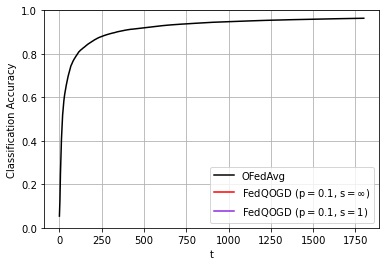

In [6]:
import matplotlib.pyplot as plt

t1 = list(range(len(accuracy_list)))
t2 = list(range(len(r_accuracy_list)))
t3 = list(range(len(rq_accuracy_list)))

y1 = accuracy_list
y2 = r_accuracy_list
y3 = rq_accuracy_list

# plotting the points
plt.plot(t1, y1, 'black', label='OFedAvg')
plt.plot(t2, y2, 'r-', label=r'FedQOGD ($\mathdefault{p=0.1}$, $\mathdefault{s=\infty}$)')
plt.plot(t3, y3, 'blueviolet', label=r'FedQOGD ($\mathdefault{p=0.1}$, $\mathdefault{s=1}$)')

plt.ylim([0, 1]) 
plt.legend(ncol = 1)

# naming the x axis
plt.xlabel('t')
# naming the y axis
plt.ylabel('Classification Accuracy')
 
# giving a title to my graph
 
# function to show the plot
plt.grid()
plt.show()